# 7



---
**Outline**

1. Review
2. The Effect of GATE Program on Earning
3. The Effect of Alcohol Consumption on Death
4. The Effect of Education on Earning
5. The Effect of Financial Assitance on Government Support

---
## Regression Discontinuity

- RDD focuses on treatment assigned at a specific cutoff point.
- Binary treatment variable: Treatment assigned on one side, no treatment on the other.
- Running variable: Determines treatment assignment.
- Cutoff: Value of the running variable determining treatment.
- Bandwidth: Area around the cutoff considered comparable for analysis. Narrow bandwidth around the cutoff zone assumes minimal differences apart from the cutoff.
- The core elements of the discontinuity regression research design:
  - Take into account how the running variable usually affects the results
  - Focus on observations near the cutoff, within the chosen bandwidth.
  - Compare those that are just above the cutoff with those that are below to get the effect of treatment.
- Simple approach that relies on regression.
$$
    Y = \beta_0 + \beta_1(Running-Cutoff) + \beta_2Treated + \beta_3(Running-Cutoff)\times Treated + \varepsilon
$$
- From the equation , we will have two straight lines:
  - One with the intercept β0 and the slope β1 , to the untreated side of the cutoff
  - Another with the intercept β0 +β2 and the slope β1 +β3 to the treated side of the cutoff.


In [2]:
!pip install linearmodels
!pip install causalinference
!pip install causaldata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 25.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for causaldata: filename=causaldata-0.1.5-py3-none-any.whl size=2767646 sha256=ad12343755ba525dba036c964c5685af05c96a6563eaef445efefab5f91a2bc2
  Stored in directory: /root/.cache/pip/wheels/a1/03/f7/4feb3ae1964932dc58fe5acfc4bdb02d5df05dd6b8aa2d8437
Successfully built causaldata


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
import linearmodels as lm

from causalinference.causal import CausalModel
from causaldata import gov_transfers

#  The Effect of GATE Program on Earning

- We want to know the effect of participation in a Gifted education, also known as gifted and talented education (GATE) program on adult earnings.
- The GATE program's admission is determined by test scores.
- It admits individuals with test scores above 75, while scores at or below 75 result in non-admission.


## Simulate Data

In [4]:
# Create the DataFrame
np.random.seed(0)  # for reproducibility
n = 1000

test_scores = np.random.rand(n) * 100
gate_indicator = (test_scores >= 75)

earnings = np.random.rand(n) * 40 + 10 * gate_indicator + test_scores / 2
rdd_data = pd.DataFrame({'test': test_scores, 'GATE': gate_indicator, 'earn': earnings})
rdd_data

,test,GATE,earn
0,54.881350,False,51.155886
1,71.518937,False,36.162016
2,60.276338,False,49.171217
3,54.488318,False,55.594975
4,42.365480,False,22.941757
...,...,...,...
995,9.767637,False,36.535080
996,51.492220,False,54.594035
997,93.841202,True,76.124913
998,22.864655,False,37.186889


## Visualization

<Axes: xlabel='test', ylabel='earn'>

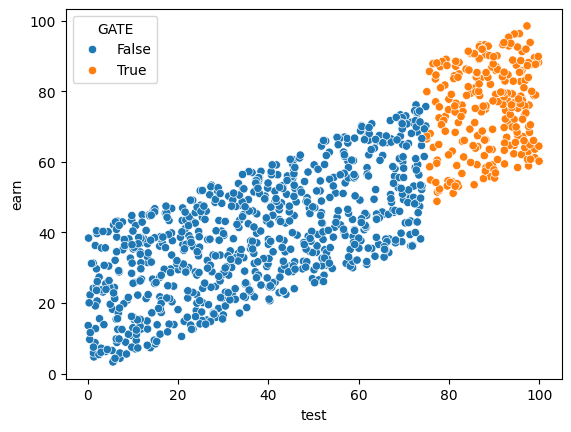

In [5]:
sns.scatterplot(x = rdd_data["test"], y = rdd_data["earn"], hue = rdd_data["GATE"])

- To face the problem, we can concentrate on a specific range around the cutoff score.
- For instance, let's consider scores between 73 and 77.
- Within this range, the assignment to either side of the cutoff can be assumed to be largely random, minimizing the influence of unobserved variables. ie. the small difference 73-77 here could be due to just having a bad day before the test)


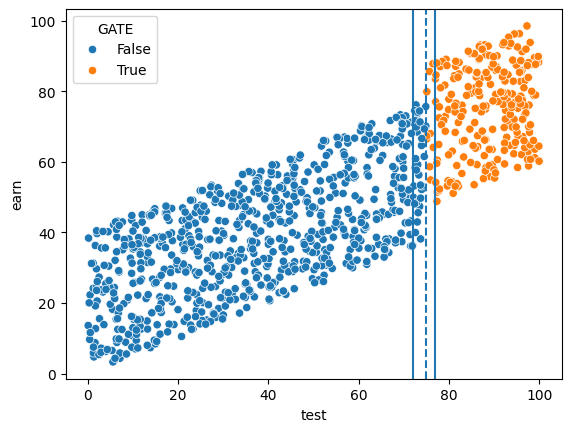

In [6]:
# Choose the bandwidth for the RDD analysis
bandwidth = 2

# Filter data within the bandwidth
rdd_filtered = rdd_data[np.abs(75 - rdd_data['test']) < bandwidth]

sns.scatterplot(x = rdd_data["test"], y = rdd_data["earn"], hue = rdd_data["GATE"])
plt.axvline(72, linestyle = "-")
plt.axvline(75, linestyle = "--")
plt.axvline(77, linestyle = "-")

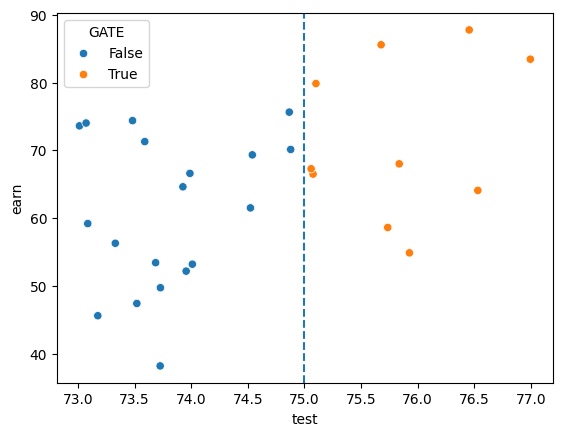

In [7]:
sns.scatterplot(x = rdd_filtered["test"], y = rdd_filtered["earn"], hue = rdd_filtered["GATE"])
plt.axvline(75, linestyle = "--")

## Simple RDD Calculation

In [8]:
# Calculate the mean earnings for each side of the cutoff
rdd_result = rdd_filtered.groupby('GATE')['earn'].mean().reset_index()
rdd_result

,GATE,earn
0,False,60.862689
1,True,71.612663


In [9]:
# Calculate the treatment effect
effect = rdd_result['earn'][1] - rdd_result['earn'][0]
print("Treatment effect:", effect)

Treatment effect: 10.749973696302447


## Conclusion

#  The Effect of Alcohol Consumption on Death

## Background

- From a perspective focused on public policy, the argument can be made that reducing the mortality rate should be a primary goal. If alcohol consumption significantly contributes to an increase in the mortality rate, then it's logical to avoid reducing the minimum drinking age.
- This approach aligns with the overarching aim of reducing deaths stemming from alcohol consumption. To estimate the effect of alcohol on mortality, researchers can leverage a specific natural occurrence.
- The legal drinking age creates a clear discontinuity in behaviors. For instance, in the United States, individuals just below the age of 21 tend to abstain from drinking or consume significantly less, while those just above 21 are more likely to consume alcohol.
- This implies that there's a sudden change in the likelihood of alcohol consumption as individuals turn 21, and this phenomenon can be examined using a Regression Discontinuity Design (RDD) approach.

## Load Data

- We can collect mortality data grouped by age.
- Each entry in the dataset represents the average age of a specific group of individuals along with corresponding average mortality rates for various causes, including all causes combined, deaths due to moving vehicle accidents (MVA), and deaths resulting from suicide (suicide).

## Interpretation
- The model's findings indicate that mortality increases by 7.6627 points in response to alcohol consumption.
- Another interpretation is that the consumption of alcohol raises the likelihood of death from all causes by approximately 8%.
- This calculation considers the percentage increase relative to the baseline

In [10]:
drinking = pd.read_csv("drinking.csv")
drinking.head()[["agecell", "all", "mva", "suicide"]]

,agecell,all,mva,suicide
0,19.068493,92.825400,35.829327,11.203714
1,19.150684,95.100740,35.639256,12.193368
2,19.232876,92.144295,34.205650,11.715812
3,19.315070,88.427760,32.278957,11.275010
4,19.397260,88.704940,32.650967,10.984314


In [11]:
drinking["agecell"] -= 21
drinking["agecell"].head()

,agecell
0,-1.931507
1,-1.849316
2,-1.767124
3,-1.684930
4,-1.602740


## Visualization

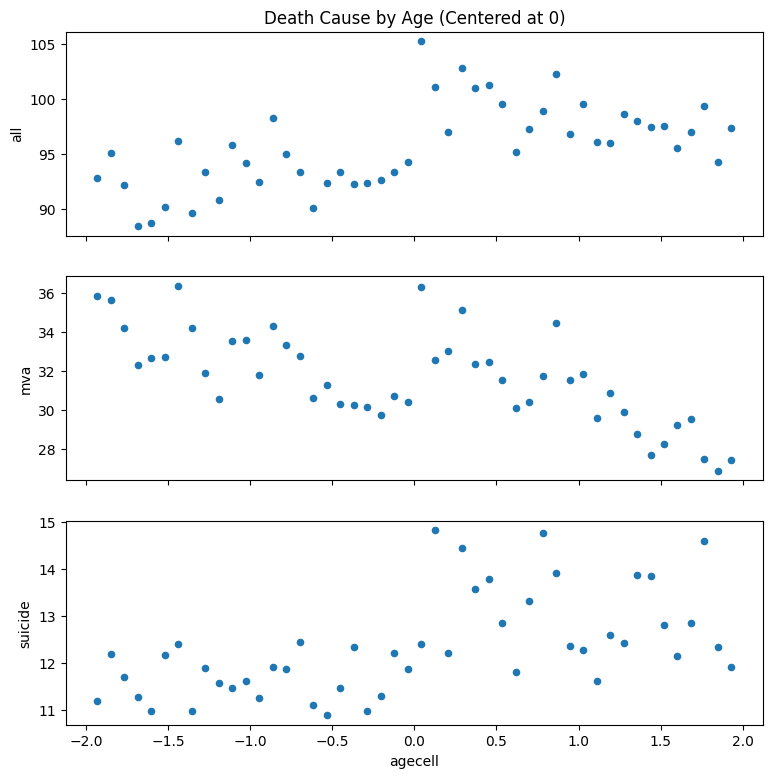

In [12]:
plt.figure(figsize=(9,9))
ax = plt.subplot(3,1,1)

drinking.plot.scatter(x="agecell", y="all", ax=ax)
plt.title("Death Cause by Age (Centered at 0)")

ax = plt.subplot(3,1,2, sharex=ax)
drinking.plot.scatter(x="agecell", y="mva", ax=ax)

ax = plt.subplot(3,1,3, sharex=ax)
drinking.plot.scatter(x="agecell", y="suicide", ax=ax);

### Ordinary Least Square

Estimate the effect of alcohol consumption on death by all causes at 21 years.

In [13]:
rdd_df = drinking.assign(threshold = (drinking["agecell"] > 0).astype(int))
rdd_df[["agecell","threshold"]]

,agecell,threshold
0,-1.931507,0
1,-1.849316,0
2,-1.767124,0
3,-1.684930,0
4,-1.602740,0
5,-1.520548,0
6,-1.438356,0
7,-1.356165,0
8,-1.273973,0
9,-1.191780,0


In [14]:
rdd_df.head()[["agecell", "all", "mva", "suicide"]]

,agecell,all,mva,suicide
0,-1.931507,92.825400,35.829327,11.203714
1,-1.849316,95.100740,35.639256,12.193368
2,-1.767124,92.144295,34.205650,11.715812
3,-1.684930,88.427760,32.278957,11.275010
4,-1.602740,88.704940,32.650967,10.984314


In [15]:
# create and fit the model
model = sm.wls("all ~ agecell + threshold + agecell:threshold", rdd_df).fit()

print(model.summary().tables[1])

                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            93.6184      0.932    100.399      0.000      91.739      95.498
agecell               0.8270      0.819      1.010      0.318      -0.823       2.477
threshold             7.6627      1.319      5.811      0.000       5.005      10.320
agecell:threshold    -3.6034      1.158     -3.111      0.003      -5.937      -1.269


In [16]:
# create and fit the model
model = sm.wls("all ~ agecell * threshold", rdd_df).fit()

print(model.summary().tables[1])

                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            93.6184      0.932    100.399      0.000      91.739      95.498
agecell               0.8270      0.819      1.010      0.318      -0.823       2.477
threshold             7.6627      1.319      5.811      0.000       5.005      10.320
agecell:threshold    -3.6034      1.158     -3.111      0.003      -5.937      -1.269


## Interpretation
- The model's findings indicate that mortality increases by 7.6627 points in response to alcohol consumption.
- Another interpretation is that the consumption of alcohol raises the likelihood of death from all causes by approximately 8%.
- This calculation considers the percentage increase relative to the baseline

In [17]:
model.params

,0
Intercept,93.618368
agecell,0.826995
threshold,7.662712
agecell:threshold,-3.603360


In [18]:
100 * (model.params["threshold"]/model.params["Intercept"])

np.float64(8.185051455878664)

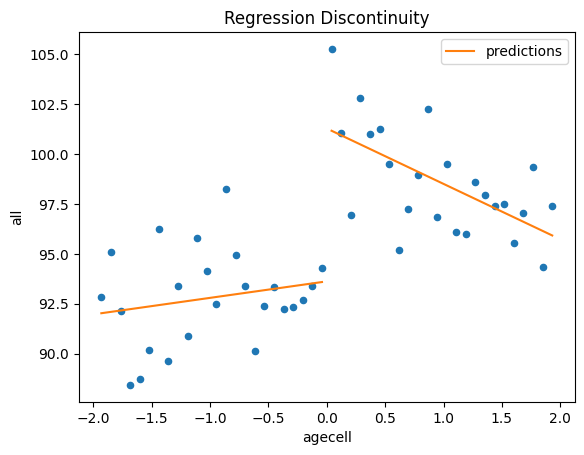

In [19]:
ax = drinking.plot.scatter(x = "agecell", y="all", color="C0")

drinking.assign(predictions = model.fittedvalues).plot(x="agecell", y="predictions", ax=ax, color="C1")

plt.title("Regression Discontinuity");

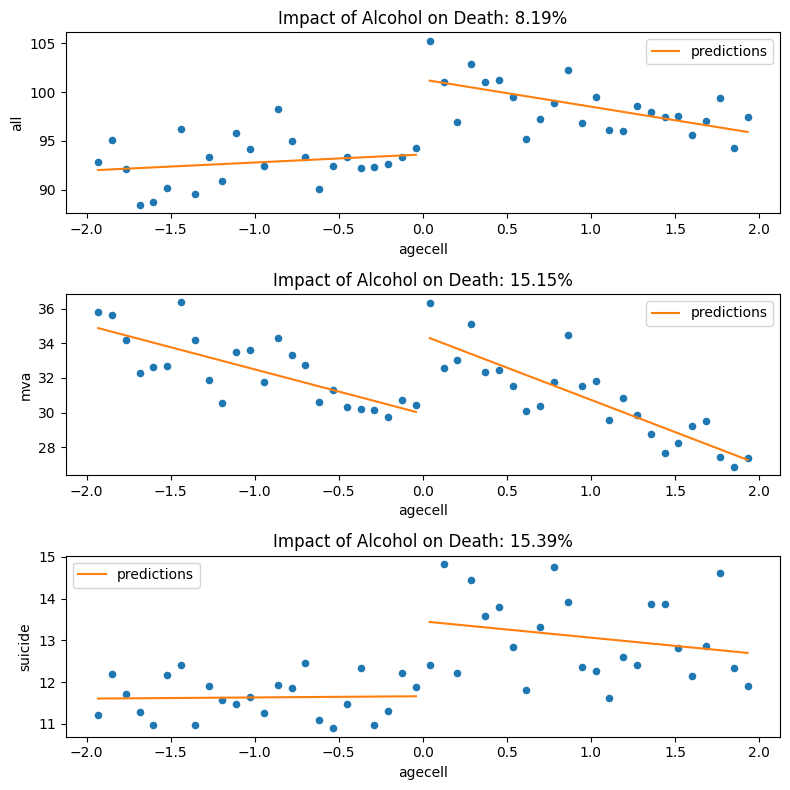

In [20]:
plt.figure(figsize=(8,8))

for p, cause in enumerate(["all", "mva", "suicide"], 1):
    ax = plt.subplot(3,1,p)

    drinking.plot.scatter(x = "agecell", y = cause, ax=ax)

    m = sm.wls(f"{cause} ~ agecell * threshold", rdd_df).fit()

    ate_pct = 100*(m.params["threshold"]/m.params["Intercept"])

    drinking.assign(predictions = m.fittedvalues).plot(x="agecell", y="predictions", ax=ax, color="C1")

    plt.title(f"Impact of Alcohol on Death: {np.round(ate_pct, 2)}%")

plt.tight_layout()

## Conclusion

The Regression Discontinuity Design (RDD) reveals that alcohol consumption increases the probability of death due to suicide and car accidents by 15%, a pretty significant amount. These findings provide strong reasons against reducing the legal drinking age, especially if the objective is to minimize mortality rates.

## Kernel

- When analyzing values at the starting and ending points of two regression lines, it's essential to set appropriate limits.
- Inaccuracies can arise if the regression emphasizes fitting other data points excessively, potentially leading to **a poor fit at the threshold**. This misfit could result in an incorrect measurement of the treatment effect.
- To address this issue, one approach is to assign greater importance to data points near the threshold.
- Among the various methods, a popular choice involves reweighting samples using **a triangular kernel**.
- The weights are adjusted by the bandwidth, which determines the rate at which weights decrease. A larger bandwidth results in slower weight reduction, whereas a smaller bandwidth leads to quicker weight diminishment.

To illustrate, the weights for this kernel applied to our problem can be understood better. In this scenario, a bandwidth of 1 is selected, restricting consideration to individuals aged between 20 and 22 years.

In [22]:
def kernel(R, c, h):
    indicator = (np.abs(R-c) <= h).astype(float)
    return indicator * (1 - np.abs(R-c)/h)

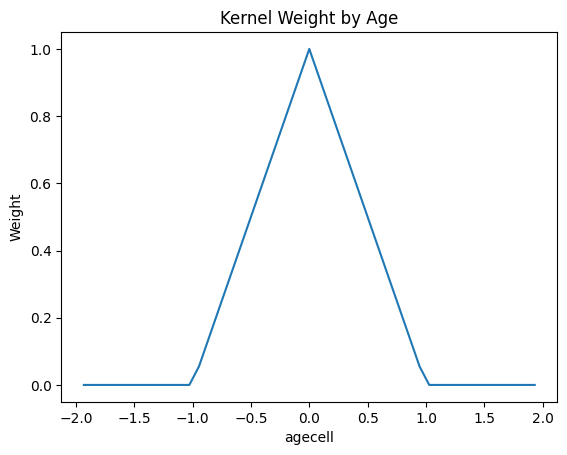

In [23]:
plt.plot(drinking["agecell"], kernel(drinking["agecell"], c=0, h=1))
plt.xlabel("agecell")
plt.ylabel("Weight")
plt.title("Kernel Weight by Age");

In [24]:
kernel(drinking["agecell"], c=0, h=1)

,agecell
0,-0.000000
1,-0.000000
2,-0.000000
3,-0.000000
4,-0.000000
5,-0.000000
6,-0.000000
7,-0.000000
8,-0.000000
9,-0.000000


In [25]:
# Create and Fit the model
model = sm.wls("all ~ agecell * threshold", rdd_df, weights = kernel(drinking["agecell"], c=0, h=1)).fit()

print(model.summary().tables[1])

                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            93.2002      0.731    127.429      0.000      91.726      94.674
agecell               0.4109      1.789      0.230      0.819      -3.196       4.017
threshold             9.7004      1.034      9.378      0.000       7.616      11.785
agecell:threshold    -7.1759      2.531     -2.835      0.007     -12.276      -2.075


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:806: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


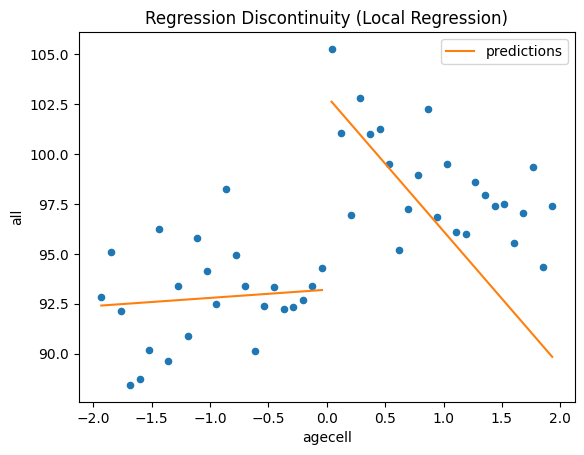

In [26]:
ax = drinking.plot.scatter(x="agecell", y="all", color="C0")
drinking.assign(predictions = model.fittedvalues).plot(x="agecell", y="predictions", ax=ax, color="C1")
plt.title("Regression Discontinuity (Local Regression)");

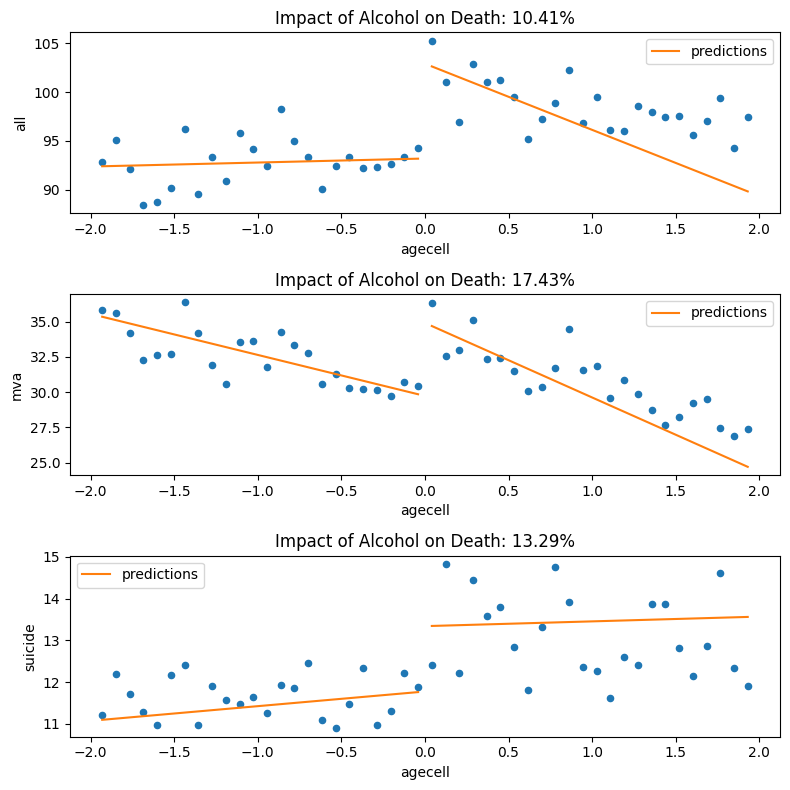

In [27]:
plt.figure(figsize=(8,8))
weights = kernel(drinking["agecell"], c=0, h=1)

for p, cause in enumerate(["all", "mva", "suicide"], 1):
    ax = plt.subplot(3,1,p)
    drinking.plot.scatter(x="agecell", y=cause, ax=ax)

    m = sm.wls(f"{cause}~agecell * threshold", rdd_df, weights=weights).fit()
    ate_pct = 100*((m.params["threshold"] + m.params["Intercept"])/m.params["Intercept"] - 1)

    drinking.assign(predictions=m.fittedvalues).plot(x="agecell", y="predictions", ax=ax, color="C1")
    plt.title(f"Impact of Alcohol on Death: {np.round(ate_pct, 2)}%")

plt.tight_layout()

## Conclusion

- Except for cases involving suicide, the adding of the kernel weight seems to have the negative impact on alcohol bigger.
- If the objective is to reduce the mortality rate, it would be unwise to suggest a decrease in the legal drinking age.
- The evident link between alcohol and mortality rates remains clear.

#  Education on Earning

Regarding education's impact on earnings, two predominant economic viewpoints emerge:
- The widely recognized argument contends that education boosts human capital, thereby enhancing productivity and leading to increased earnings. This perspective suggests that education brings about positive personal transformation.
- Another perspective posits that education serves as a signaling mechanism. It exposes individuals to demanding tests and academic challenges. Successfully navigating these signals to employers that the individual is a competent worker. Education, according to this perspective, doesn't necessarily elevate productivity; rather, it showcases an individual's pre-existing productivity. This concept is known as the "sheepskin effect," drawing from historical diploma production on sheepskin material.

## RDD Approach
- To investigate this theory, Clark and Martorell employed a regression discontinuity design to quantify the impact of completing 12th grade on earnings.
- In the Texas context, graduation relies on **passing a specific exam**. Testing starts in the 10th grade, allowing multiple attempts. Ultimately, there's a final opportunity during the 12th grade.
- The researchers' approach involved acquiring data from students who took this last-chance exam and comparing those who narrowly failed it with those who narrowly passed. These students will have very similar human capital, but different signaling credentials. Specifically, those who just managed to pass receive a diploma.

## Load Data

In [28]:
sheepskin = pd.read_csv("sheepskin.csv")[["avgearnings", "minscore", "receivehsd", "n"]]
sheepskin.head()

,avgearnings,minscore,receivehsd,n
0,11845.086,-30.0,0.416667,12
1,9205.679,-29.0,0.387097,31
2,8407.745,-28.0,0.318182,44
3,11114.087,-27.0,0.377778,45
4,10814.624,-26.0,0.306667,75


- The dataset is once again grouped based on the running variable.
- It includes not only the running variable itself (minscore), already centered at zero, and the outcome variable (avgearnings), but it also incorporates the probability of receiving a diploma within each score cell and the cell's size (n).
- For instance, consider a cell where there were 12 students with scores 30 below the threshold; among these, only 5 managed to acquire a diploma (12 * 0.416).

This reveals an inconsistency in the assignment of treatment. Some students below the passing threshold still obtained a diploma. Consequently, the regression discontinuity is characterized as fuzzy rather than sharp. It's notable that the probability of receiving a diploma doesn't abruptly transition from zero to one at the threshold. But it does jump from something like 50% to 90%.

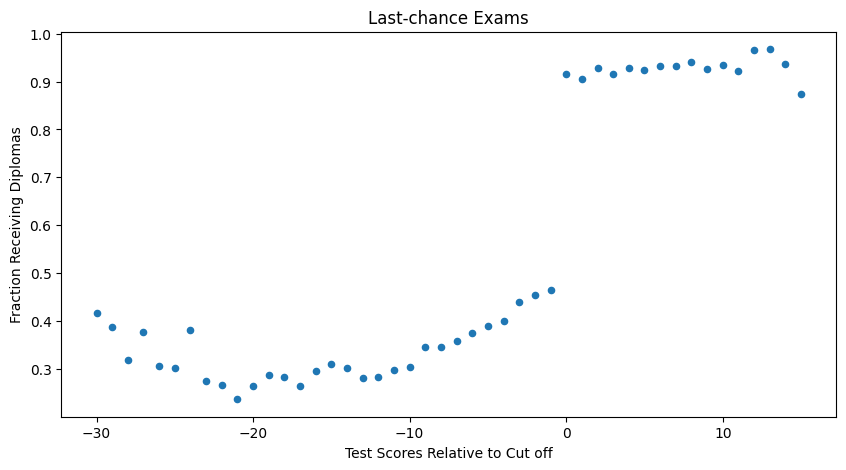

In [29]:
sheepskin.plot.scatter(x = "minscore", y = "receivehsd", figsize=(10,5))

plt.xlabel("Test Scores Relative to Cut off")
plt.ylabel("Fraction Receiving Diplomas")
plt.title("Last-chance Exams");

Fuzzy regression discontinuity can be likened to a non-compliance form.
- The expectation is that crossing the threshold must guarantee acceptance of diplomas for all; however, some students (referred to as "never taking") did not accept it.
- On the other hand, being under the must threshold precludes attaining a diploma, but certain students (so-called “always taking”) manage to get it regardless.

## McCrary Test


- A potential challenge to our RDD argument arises if individuals can **manipulate their position at the threshold**.
- In the sheepskin example, this manipulation might occur if students just below the threshold find ways to slightly boost their test scores.
- Another scenario arises when a specific income level is necessary to access a government benefit; some families might intentionally reduce their income to qualify for the program.

In such cases, numerous entities tend to cluster just above or just below the threshold. To investigate this phenomenon, we can create a plot of the density function of the running variable and observe whether there are noticeable spikes near the threshold. In our specific case, the density is represented by the "n" column in our data.

Text(0, 0.5, 'Smoothness at the Threshold')

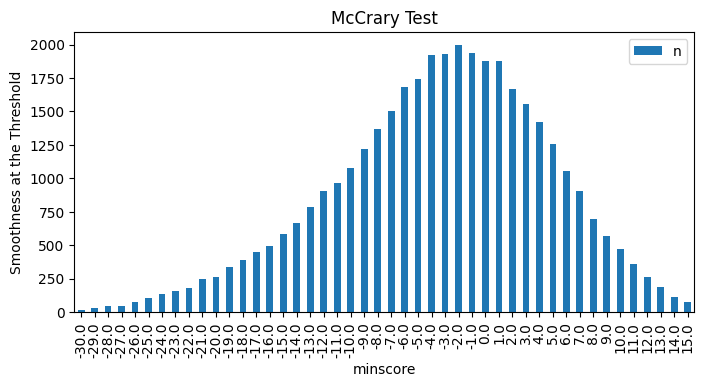

In [30]:
plt.figure(figsize=(8,8))

ax = plt.subplot(2,1,1)
sheepskin.plot.bar(x="minscore", y="n", ax=ax)
plt.title("McCrary Test")
plt.ylabel("Smoothness at the Threshold")

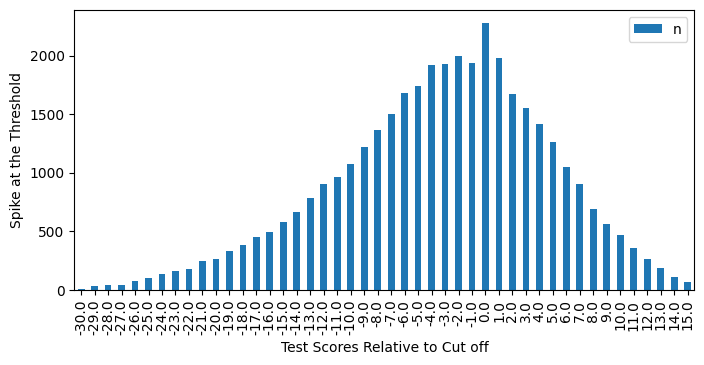

In [31]:
plt.figure(figsize=(8,8))

ax = plt.subplot(2,1,2, sharex=ax)
sheepskin.replace({1877:1977, 1874:2277}).plot.bar(x="minscore", y="n", ax=ax)
plt.xlabel("Test Scores Relative to Cut off")
plt.ylabel("Spike at the Threshold");

For illustration purposes only, the second plot shows what clustering would look like if students could manipulate where they fell to threshold. We'd see a spike in cell density just above threshold, because a lot of students would be in that cell, barely passing the test.

## Model Estimate

Getting this out of the way, we can go back to estimate the sheepskin effect. Here, we will use as weight the kernel with a bandwidth of 15. Since we also have the cell size, we will multiply the kernel by the sample size to get a final weight for the cell.

In [32]:
sheepskin.head()

,avgearnings,minscore,receivehsd,n
0,11845.086,-30.0,0.416667,12
1,9205.679,-29.0,0.387097,31
2,8407.745,-28.0,0.318182,44
3,11114.087,-27.0,0.377778,45
4,10814.624,-26.0,0.306667,75


In [33]:
# create threshold variable
sheepsking_rdd = sheepskin.assign(threshold = (sheepskin["minscore"]>0).astype(int))
sheepsking_rdd.head()

,avgearnings,minscore,receivehsd,n,threshold
0,11845.086,-30.0,0.416667,12,0
1,9205.679,-29.0,0.387097,31,0
2,8407.745,-28.0,0.318182,44,0
3,11114.087,-27.0,0.377778,45,0
4,10814.624,-26.0,0.306667,75,0


In [34]:
model = sm.wls(formula = "avgearnings ~ minscore * threshold",
               data =  sheepsking_rdd,
               weights = kernel(sheepsking_rdd["minscore"], c=0, h=15) * sheepsking_rdd["n"]).fit()

print(model.summary().tables[1])

                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.399e+04     83.678    167.181      0.000    1.38e+04    1.42e+04
minscore             181.6636     16.389     11.084      0.000     148.588     214.739
threshold            -97.7571    145.723     -0.671      0.506    -391.839     196.325
minscore:threshold    18.1955     30.311      0.600      0.552     -42.975      79.366


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:806: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


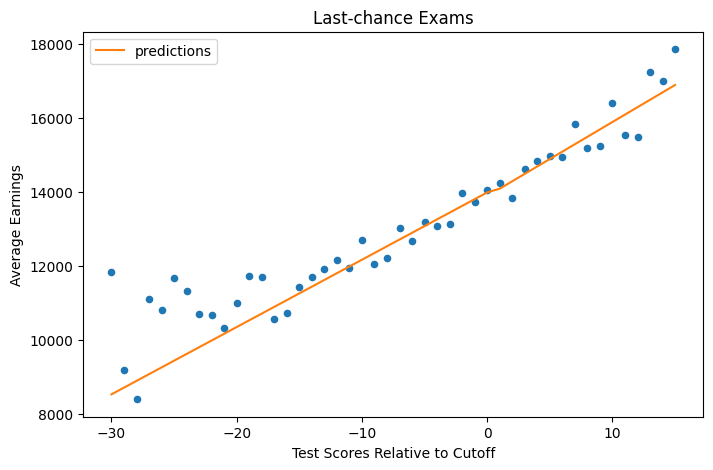

In [35]:
ax = sheepskin.plot.scatter(x="minscore", y="avgearnings", color="C0")

sheepskin.assign(predictions = model.fittedvalues).plot(x="minscore", y="predictions", ax=ax, color="C1", figsize=(8,5))

plt.xlabel("Test Scores Relative to Cutoff")
plt.ylabel("Average Earnings")
plt.title("Last-chance Exams");

## Conclusion

- When we visualize these outcomes, we observe a smoothly continuous line at the threshold.
- It's evident that individuals with **higher education tend to earn more money**, there's no distinct spike at the threshold where they acquire their 12th grade diploma.
- This observation lends support to the perspective that education increases earnings by making people more productive, rather than being just a signal to the marker. In simpler terms, there's no evidence of the "sheepskin effect."

#  The Effect of Financial Assistance on Government Support
    
**Background**
- The following case demonstration employs data from the Government Transfers and Political Support by Manacorda, Miguel, and Vigorito (2011). This research paper focuses on investigating a large poverty alleviation initiative implemented in Uruguay.
- The program involved distributing financial assistance to a considerable segment of the population. The primary objective of the study was to analyze whether individuals who received these financial benefits were more tend to express support for the recently established center-left government, which was responsible for implementing the poverty alleviation program.
 - The recipients of the payments were determined based on a specific criterion: having an income that fell below a certain threshold. However, the government didn't solely rely on income as the deciding factor, as that could potentially be manipulated. Instead, they considered a range of factors including housing, employment status, reported income, and level of education.
- By evaluating these various aspects, the government predicted an individual's potential income. This predicted income then became the variable used to determine eligibility. Those individuals whose predicted income was below a specific cutoff point were deemed eligible for the financial assistance.
    
**Methodology**
- Researchers conducted a survey near the income cutoff to measure post-survey government support.

## Load Data

In [36]:
gov = gov_transfers.load_pandas().data
gov

,Income_Centered,Education,Age,Participation,Support
0,0.006571,3.5,23.666666,0,1.0
1,0.011075,1.5,42.000000,0,1.0
2,0.002424,4.0,43.000000,0,1.0
3,0.007650,6.0,21.000000,0,0.5
4,0.010001,2.0,33.000000,0,1.0
...,...,...,...,...,...
1943,-0.013489,2.0,27.333334,1,1.0
1944,-0.012106,4.5,37.000000,1,1.0
1945,-0.010159,5.0,25.857143,1,1.0
1946,-0.008668,3.0,26.000000,1,1.0


In [37]:
gov["Support"].value_counts()/len(gov)

,count
Support,
1.0,0.674025
0.5,0.244353
0.0,0.081622


In [38]:
gov.describe()

,Income_Centered,Education,Age,Participation,Support
count,1948.000000,1897.000000,1948.000000,1948.000000,1948.000000
mean,-0.001580,4.070623,29.124287,0.578542,0.796201
std,0.011631,1.530783,14.428391,0.493919,0.318164
min,-0.019991,0.000000,6.500000,0.000000,0.000000
25%,-0.011714,3.000000,18.383333,0.000000,0.500000
50%,-0.002796,4.000000,25.666666,1.000000,1.000000
75%,0.008447,5.500000,36.000000,1.000000,1.000000
max,0.019892,6.500000,73.000000,1.000000,1.000000


In [39]:
# cut at 0, and 15 places on either side
edges = np.linspace(-.02, .02, 31)

gov['Bins'] = pd.cut(gov['Income_Centered'], bins = edges)
gov

,Income_Centered,Education,Age,Participation,Support,Bins
0,0.006571,3.5,23.666666,0,1.0,"(0.00533, 0.00667]"
1,0.011075,1.5,42.000000,0,1.0,"(0.0107, 0.012]"
2,0.002424,4.0,43.000000,0,1.0,"(0.00133, 0.00267]"
3,0.007650,6.0,21.000000,0,0.5,"(0.00667, 0.008]"
4,0.010001,2.0,33.000000,0,1.0,"(0.00933, 0.0107]"
...,...,...,...,...,...,...
1943,-0.013489,2.0,27.333334,1,1.0,"(-0.0147, -0.0133]"
1944,-0.012106,4.5,37.000000,1,1.0,"(-0.0133, -0.012]"
1945,-0.010159,5.0,25.857143,1,1.0,"(-0.0107, -0.00933]"
1946,-0.008668,3.0,26.000000,1,1.0,"(-0.00933, -0.008]"


In [40]:
# Mean within bins

binned = gov.groupby(['Bins']).agg('mean')

binned

/tmp/ipython-input-40-813517113.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned = gov.groupby(['Bins']).agg('mean')


,Income_Centered,Education,Age,Participation,Support
Bins,,,,,
"(-0.02, -0.0187]",-0.019386,4.125661,27.531276,1.0,0.921429
"(-0.0187, -0.0173]",-0.017996,4.166667,24.979443,1.0,0.817073
"(-0.0173, -0.016]",-0.016602,4.204657,26.590214,1.0,0.904412
"(-0.016, -0.0147]",-0.015420,4.265789,27.337899,1.0,0.845361
"(-0.0147, -0.0133]",-0.014047,3.947283,24.971949,1.0,0.838710
"(-0.0133, -0.012]",-0.012674,4.135417,26.698361,1.0,0.869565
"(-0.012, -0.0107]",-0.011292,4.154229,29.111270,1.0,0.771429
"(-0.0107, -0.00933]",-0.010058,3.981507,25.172668,1.0,0.856164
"(-0.00933, -0.008]",-0.008564,3.561869,25.724615,1.0,0.847826


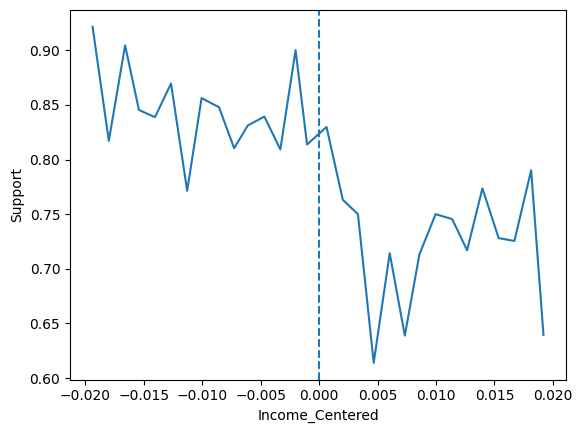

In [41]:
# And plot
sns.lineplot(x = binned['Income_Centered'], y = binned['Support'])

# Add vertical line at cutoff
plt.axvline(0, 0, 1, linestyle = "--")

In [42]:
# Run the polynomial model

model = sm.ols('Support ~ Income_Centered * Participation + I(Income_Centered**2) * Participation', gov)
m1 = model.fit()

print(m1.summary().tables[1])

                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 0.7690      0.034     22.321      0.000       0.701       0.837
Income_Centered                         -11.5666      7.777     -1.487      0.137     -26.819       3.686
Participation                             0.0929      0.046      2.025      0.043       0.003       0.183
Income_Centered:Participation            19.3000     10.445      1.848      0.065      -1.185      39.785
I(Income_Centered ** 2)                 562.2473    372.182      1.511      0.131    -167.672    1292.166
I(Income_Centered ** 2):Participation  -101.1025    500.196     -0.202      0.840   -1082.079     879.874


- Based on the second-degree polynomial model, our calculation indicates that receiving financial benefit led to a 9.3 percentage point rise in government support. This outcome is quite favorable!

## Reference

- The Effect - Chapter 20 by Nick Hungtinton-Klein
- Causal Inference for The Brave and True - Chapter 16 By Matheus Facure Alves